#####################################################################################
#
#   Pennylane Basic Tutorial Qubit Rotations
#   @Text Tjark Ziehm
#   @Version 0.01 Dez 2021
#   @Creater Xanadu/Pennylane-Team
#   @Documentation
#   -Optimizer @ Pennylane: 
#         https://pennylane.readthedocs.io/en/stable/introduction/optimizers.html
#   -@BQP-Docs:   
#      https://docs.google.com/document/d/1YYOCEOMKd2cmsvEPfVoHobVOthlL9vW2XdDjT-pToCs/edit?usp=sharing     
#   -@BQP-Book
#  https://quantum-research.gitbook.io/introduction-to-quantum-computing/quantum-machine-learning/optimizer
#
#   @Science 
#
#   @Guide
#
#   @Goal
#
#   @DataSet:
#             
#
#
#####################################################################################

In this tutorial we will go to make 2 Rotations at one Qubit and one messurment.
This is represented in the picture after the import section.

In [49]:
import pennylane as qml
from pennylane import numpy as np
from IPython.display import Image
Image('https://pennylane.ai/qml/_images/rotation_circuit.png') 

import matplotlib.pyplot as plt
%matplotlib inline

from qutip import *

In [4]:
dev1 = qml.device("default.qubit", wires=1)

This Circuit rotates the qubit at the X-Axe and  then at the Y-Axe:
![](https://github.com/ohioh/IntroductionQuantumComputing/blob/main/QuantumMachineLearning/PennyLaneTutorials/BasicTutorialQubitRotation/data/RotationX.png?raw=true)

followed by ...
![](https://github.com/ohioh/IntroductionQuantumComputing/blob/main/QuantumMachineLearning/PennyLaneTutorials/BasicTutorialQubitRotation/data/RotationY.png?raw=true)


The State will be in a Superposition-State:
![](https://github.com/ohioh/IntroductionQuantumComputing/blob/main/QuantumMachineLearning/PennyLaneTutorials/BasicTutorialQubitRotation/data/Superposition.png?raw=true)

Glimpse: A Circuit represents the Superosition-Calculation for a task
In our Case we make a Validation with the Pauli Z Gate at the end

In [39]:
@qml.qnode(dev1)

def circuit(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=0)
    return qml.expval(qml.PauliZ(0))

params = np.array([0.54, 0.12])

In [44]:
print("Expectation value:",circuit(params))

Expectation value: 0.8515405859048366


In [45]:
print(qml.draw(circuit)(params))

 0: ──RX(0.54)──RY(0.12)──┤ ⟨Z⟩ 



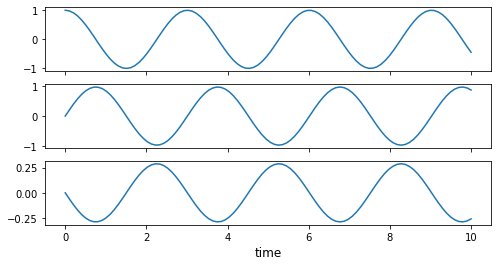

In [53]:
H = sigmaz() + 0.3 * sigmay()
e_ops = [sigmax(), sigmay(), sigmaz()]
times = np.linspace(0, 10, 100)
psi0 = (basis(2, 0) + basis(2, 1)).unit()
result = mesolve(H, psi0, times, [], e_ops)

plot_expectation_values(result);



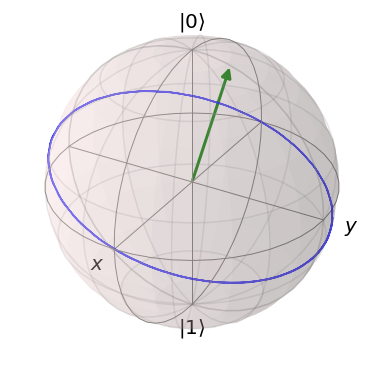

In [54]:
b = Bloch()
b.add_vectors(expect(H.unit(), e_ops))
b.add_points(result.expect, meth='l')

b.make_sphere()

## Calculating quantum gradients

 0: ──RX(0.54)──RY(0.12)──┤ ⟨Z⟩ 



In [8]:
dcircuit = qml.grad(circuit, argnum=0)

In [9]:
print(dcircuit([0.54, 0.12]))

[array(-0.51043865), array(-0.1026782)]


In [10]:
@qml.qnode(dev1)
def circuit2(phi1, phi2):
    qml.RX(phi1, wires=0)
    qml.RY(phi2, wires=0)
    return qml.expval(qml.PauliZ(0))

In [11]:
dcircuit = qml.grad(circuit2, argnum=[0, 1])
print(dcircuit(0.54, 0.12))

(array(-0.51043865), array(-0.1026782))


Optimization

In [12]:
def cost(x):
    return circuit(x)

In [17]:
init_params = np.array([0.03, 0.036], requires_grad=True)
print(cost(init_params))

0.9989023952766056


In [18]:
# initialise the optimizer
opt = qml.GradientDescentOptimizer(stepsize=0.5)

# set the number of steps
steps = 60
# set the initial parameter values
params = init_params

for i in range(steps):
    # update the circuit parameters
    params = opt.step(cost, params)

    if (i + 1) % 5 == 0:
        print("Cost after step {:5d}: {: .7f}".format(i + 1, cost(params)))

print("Optimized rotation angles: {}".format(params))

Cost after step     5:  0.9392839
Cost after step    10:  0.0826898
Cost after step    15: -0.7294844
Cost after step    20: -0.9995039
Cost after step    25: -0.9999995
Cost after step    30: -1.0000000
Cost after step    35: -1.0000000
Cost after step    40: -1.0000000
Cost after step    45: -1.0000000
Cost after step    50: -1.0000000
Cost after step    55: -1.0000000
Cost after step    60: -1.0000000
Optimized rotation angles: [1.99288228e-14 3.14159265e+00]
